In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.filters import hp_filter

In [3]:
#National Stock Exchange

In [4]:
df = pd.read_csv("NSE_BANKING_SECTOR.csv")
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-24,DHANBANK,EQ,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
41227,2021-05-25,DHANBANK,EQ,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
41228,2021-05-26,DHANBANK,EQ,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395
41229,2021-05-27,DHANBANK,EQ,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408


Prev Close: Last day close point

Open: current day open point

High: current day highest point

Low: current day lowest point

Last: the final quoted trading price for a particular stock, or stock-market index, during the most recent day of trading.

Close: Closing point for the current day

VWAP: volume-weighted average price is the ratio of the value traded to total volume traded over a particular time horizon

Volume: the amount of a security that was traded during a given period of time. For every buyer, there is a seller, and each
transaction contributes to the count of total volume.

Turnover: Total Turnover of the stock till that day

Trades: Number of buy or Sell of the stock.

Deliverable: Volumethe quantity of shares which actually move from one set of people (who had those shares in their demat account before today and are selling today) to another set of people (who have purchased those shares and will get those shares by T+2 days in their demat account).

%Deliverble: percentage deliverables of that stock

In [4]:
# Set the index of the dataframe to the date column
df.set_index('DATE', inplace=True)

In [5]:
df

,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
DATE,,,,,,,,,,,,,,
2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,DHANBANK,EQ,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
2021-05-25,DHANBANK,EQ,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
2021-05-26,DHANBANK,EQ,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395


In [12]:
df.mean()

CLOSE    292.013088
dtype: float64

In [13]:
df.var()

CLOSE    204966.321966
dtype: float64

In [17]:
df.skew()

CLOSE    2.486259
dtype: float64

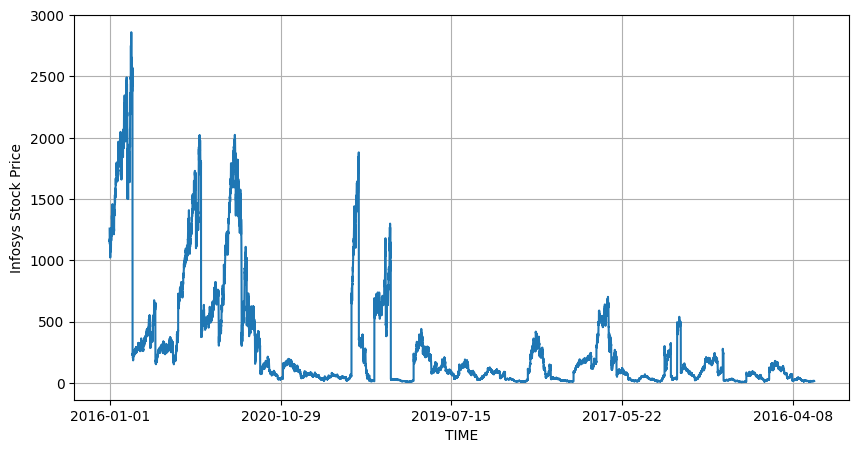

In [18]:
plt.figure(figsize=(10,5))
df['CLOSE'].plot()
plt.xlabel('TIME')
plt.ylabel('Infosys Stock Price')
plt.grid()

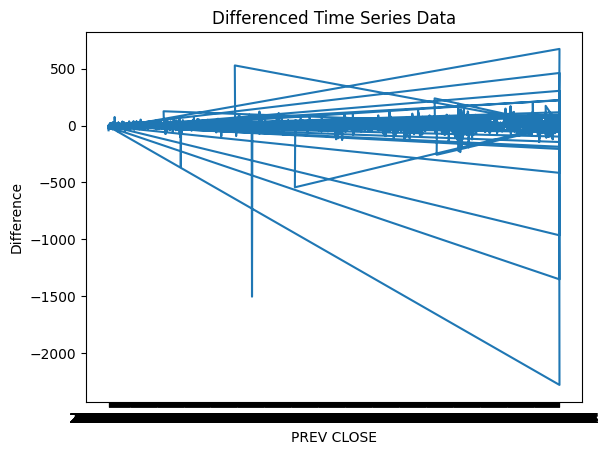

In [21]:
# Calculate the first difference of the data
diff = df.diff().dropna()

# Plot the differenced data
plt.plot(diff)

# Add labels and titles
plt.xlabel('')
plt.ylabel('Difference')
plt.title('Differenced Time Series Data')

plt.show()